In [1]:
# grv08singh@gmail.com

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [42]:
df = pd.read_csv("Live.csv")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [34]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [35]:
df['status_id'].nunique()

6997

In [36]:
df['status_type'].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

In [38]:
df[df['status_published'] == '4/19/2018 22:26']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
4592,725980084255106_850951205091326,photo,4/19/2018 22:26,383,5,6,379,2,2,0,0,0,NaN,NaN,NaN,NaN


In [39]:
df[df['status_published'] == '7/15/2017 10:52']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6977,1050855161656896_1339706342771775,video,7/15/2017 10:52,253,4432,167,209,29,5,5,5,0,NaN,NaN,NaN,NaN


In [40]:
colour=['red','blue','green','yellow','cyan']
n=0
for i in range(0,len(colour)):
    plt.scatter(X[df['Clusters(5)']==i],Y[df['Clusters(5)']==i],s=10,c=colour[i])
    plt.scatter(k.cluster_centers_[:,0] ,k.cluster_centers_[:,1], color='black')

NameError: name 'X' is not defined

In [43]:
df.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df = df.drop(columns=['status_id','Column1','Column2','Column3','Column4'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   status_published  7050 non-null   object
 2   num_reactions     7050 non-null   int64 
 3   num_comments      7050 non-null   int64 
 4   num_shares        7050 non-null   int64 
 5   num_likes         7050 non-null   int64 
 6   num_loves         7050 non-null   int64 
 7   num_wows          7050 non-null   int64 
 8   num_hahas         7050 non-null   int64 
 9   num_sads          7050 non-null   int64 
 10  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 606.0+ KB


In [7]:
df.head(2)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0


In [8]:
df['status_published'] = pd.to_datetime(df['status_published'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_type       7050 non-null   object        
 1   status_published  7050 non-null   datetime64[ns]
 2   num_reactions     7050 non-null   int64         
 3   num_comments      7050 non-null   int64         
 4   num_shares        7050 non-null   int64         
 5   num_likes         7050 non-null   int64         
 6   num_loves         7050 non-null   int64         
 7   num_wows          7050 non-null   int64         
 8   num_hahas         7050 non-null   int64         
 9   num_sads          7050 non-null   int64         
 10  num_angrys        7050 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 606.0+ KB


In [10]:
df.head(2)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0


In [11]:
df_copy = df.copy()

In [12]:
df = df.drop(columns=['status_type','status_published'])

In [13]:
df.head(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  7050 non-null   int64
 1   num_comments   7050 non-null   int64
 2   num_shares     7050 non-null   int64
 3   num_likes      7050 non-null   int64
 4   num_loves      7050 non-null   int64
 5   num_wows       7050 non-null   int64
 6   num_hahas      7050 non-null   int64
 7   num_sads       7050 non-null   int64
 8   num_angrys     7050 non-null   int64
dtypes: int64(9)
memory usage: 495.8 KB


In [15]:
sc = StandardScaler()

In [16]:
df = pd.DataFrame(sc.fit_transform(df))

In [17]:
df.head(2)

,0,1,2,3,4,5,6,7,8
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748


In [18]:
df.columns = df_copy.columns[2:]

In [19]:
df.head(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748


In [20]:
clusters = np.arange(2,8).tolist()

In [21]:
clusters

[2, 3, 4, 5, 6, 7]

In [22]:
var = []
for i in clusters:
    kmeans = KMeans(n_clusters=i, max_iter=200, random_state=10)
    kmeans.fit(df)
    var.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [23]:
var

[48802.47810852086,
 38372.99772386955,
 32469.7913623098,
 29504.38013238735,
 26189.63668302589,
 22433.02457971484]

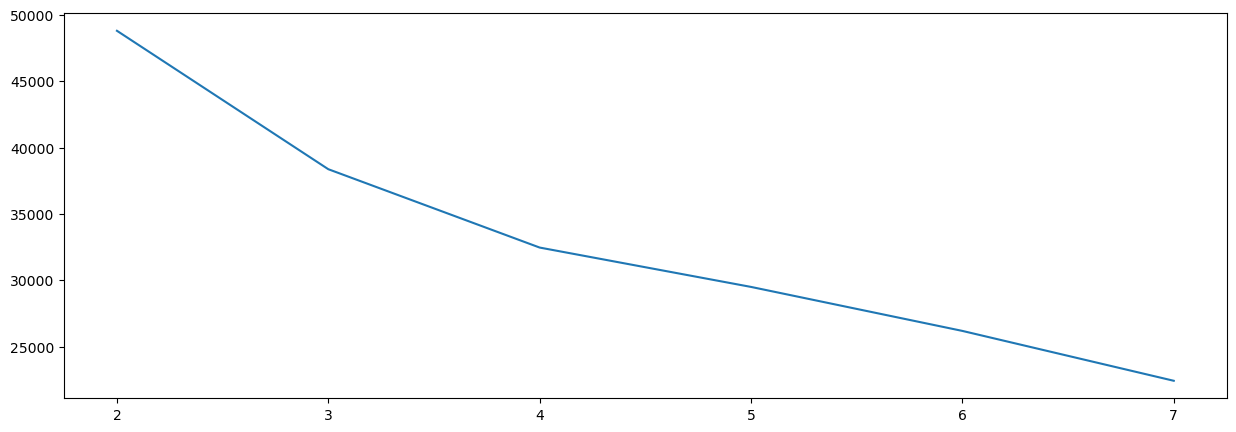

In [24]:
plt.figure(figsize=(15,5))
plt.plot(clusters, var)
plt.show()

## seems that required number of clusters is 4

## building model with 4 clusters

In [25]:
kmeans = KMeans(n_clusters=4, max_iter=200, random_state=10)

In [26]:
kmeans.fit(df)

KMeans(max_iter=200, n_clusters=4, random_state=10)

In [27]:
cluster_result = kmeans.labels_

In [28]:
cluster_result

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [29]:
df_copy['cluster_num'] = cluster_result

In [30]:
df_copy.sample(5)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_num
4365,video,2017-11-23 07:49:00,4,0,0,4,0,0,0,0,0,0
3945,photo,2018-02-06 06:42:00,128,5,4,123,1,4,0,0,0,0
3213,video,2018-01-18 22:59:00,135,1,1,134,1,0,0,0,0,0
6022,video,2017-11-24 08:14:00,214,779,377,143,68,2,1,0,0,0
5743,photo,2017-12-19 01:48:00,17,0,0,17,0,0,0,0,0,0


In [31]:
df_copy['cluster_num'].value_counts()

cluster_num
0    6264
1     380
2     372
3      34
Name: count, dtype: int64

In [44]:
df = pd.read_csv("Live.csv")

In [45]:
df_copy = df.copy()

In [46]:
df.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN


In [48]:
df = df.drop(columns=['status_id','status_published','Column1','Column2','Column3','Column4'])

In [49]:
df.head(2)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0


In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()

In [52]:
df['status_type'] = le.fit_transform(df['status_type'])

In [53]:
df.head(2)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0


In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
mm = MinMaxScaler()

In [56]:
df = pd.DataFrame(mm.fit_transform(df))

In [57]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.14003,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.00000,0.000000,0.000000,0.000000,0.0


In [58]:
kmeans = KMeans(n_clusters=2)

In [59]:
kmeans.fit(df)

KMeans(n_clusters=2)

In [60]:
kmeans.inertia_

240.0848693721476